# Data Gathering

In [1]:
from pathlib import Path
from datetime import datetime
import sys


# Define the base directory
base_dir = Path.cwd().resolve().parents[1]

# Define subdirectories
data_dir = base_dir / "data"
model_dir = base_dir / "models"
notebooks_dir = base_dir / "notebooks"

# Append base_dir to sys.path
sys.path.append(str(base_dir))

from axyom_utilities.data_extraction import extract_data

X_train, y_train, X_test, X_orig, y_orig = extract_data(data_dir, log_transform=True)


In [2]:
import pandas as pd
import glob
from pathlib import Path

def get_meta_data(meta_data_dir, oof_joker="*_oof.csv", test_joker="*_test.csv"):
    meta_data_dir = Path(meta_data_dir)
    # Define file patterns for OOF and test predictions
    oof_catch = str(meta_data_dir / oof_joker)
    test_catch = str(meta_data_dir / test_joker)
    
    oof_files = sorted(glob.glob(oof_catch))  # Sorted for consistency
    test_files = sorted(glob.glob(test_catch))  # Sorted for consistency
    
    #print(test_files)

    # Ensure the number of files matches
    assert len(oof_files) == len(test_files), "Mismatch in the number of OOF and test files."

    # Function to load and rename files with prefixes
    def load_and_prefix(files, prefix):
        dfs = []
        for file in files:
            # Extract only the base name without directory and suffix
            model_name = Path(file).stem.replace("_oof", "").replace("_test", "")
            df = pd.read_csv(file)
            #print(df.head(4))
            df.columns = [f"{prefix}{model_name}_F{i+1}" for i in range(df.shape[1])]
            dfs.append(df)
        return pd.concat(dfs, axis=1)

    # Load OOF and test predictions with identical features
    X_meta_train = load_and_prefix(oof_files, prefix="")
    X_meta_test = load_and_prefix(test_files, prefix="")

    # Ensure the columns are identical between train and test
    X_meta_test.columns = X_meta_train.columns

    # Check the shapes
    print(f"Meta-train shape: {X_meta_train.shape}")
    print(f"Meta-test shape: {X_meta_test.shape}")
    
    return X_meta_train, X_meta_test

# Example usage
#X_meta_train, X_meta_test = get_meta_data("notebooks/Ensemble Catboost XGBoost LGBM")


X_meta_train_mikail, X_meta_test_mikail = get_meta_data(notebooks_dir/"Ensemble Catboost XGBoost LGBM")

def get_oof_test(filename, column_name):        
    df = pd.read_csv(filename)
    df.columns = [column_name]
    return df

lgbm2_train = get_oof_test(notebooks_dir/"LGBM_v2\\1.0313+-0.0008\\oof_preds.csv", "LGBM_v2_Axyom")
lgbm2_test = get_oof_test(notebooks_dir/"LGBM_v2\\1.0313+-0.0008\\test_preds.csv", "LGBM_v2_Axyom")

autogluon_v2_train = get_oof_test(notebooks_dir/"Autogluon_v2\\AutogluonModels\\ag-20241225_165244\\oof_preds.csv")
autogluon_v2_test = get_oof_test(notebooks_dir/"Autogluon_v2\\AutogluonModels\\ag-20241225_165244\\test_preds.csv")

catboost_v2_train = get_oof_test(notebooks_dir/"Catboost_nonlog_feature\\1.0309+-0.0008\\oof_preds.csv")
catboost_v2_test = get_oof_test(notebooks_dir/"Catboost_nonlog_feature\\1.0309+-0.0008\\test_preds.csv")

X_meta_train = pd.concat(X_meta_train_mikail, lgbm2_train, autogluon_v2_train, catboost_v2_train)
X_meta_test = pd.concat(X_meta_test_mikail, lgbm2_test, autogluon_v2_test, catboost_v2_test)


['C:\\Users\\Axyom\\Kaggle\\PG S4e12 - Regression Insurance\\notebooks\\Ensemble Catboost XGBoost LGBM\\CAT2_test.csv', 'C:\\Users\\Axyom\\Kaggle\\PG S4e12 - Regression Insurance\\notebooks\\Ensemble Catboost XGBoost LGBM\\CAT3_test.csv', 'C:\\Users\\Axyom\\Kaggle\\PG S4e12 - Regression Insurance\\notebooks\\Ensemble Catboost XGBoost LGBM\\CAT4_test.csv', 'C:\\Users\\Axyom\\Kaggle\\PG S4e12 - Regression Insurance\\notebooks\\Ensemble Catboost XGBoost LGBM\\CAT_test.csv', 'C:\\Users\\Axyom\\Kaggle\\PG S4e12 - Regression Insurance\\notebooks\\Ensemble Catboost XGBoost LGBM\\LGBM2_test.csv', 'C:\\Users\\Axyom\\Kaggle\\PG S4e12 - Regression Insurance\\notebooks\\Ensemble Catboost XGBoost LGBM\\LGBM3_test.csv', 'C:\\Users\\Axyom\\Kaggle\\PG S4e12 - Regression Insurance\\notebooks\\Ensemble Catboost XGBoost LGBM\\LGBM4_test.csv', 'C:\\Users\\Axyom\\Kaggle\\PG S4e12 - Regression Insurance\\notebooks\\Ensemble Catboost XGBoost LGBM\\LGBM_test.csv', 'C:\\Users\\Axyom\\Kaggle\\PG S4e12 - Regress

# Meta Training

[I 2024-12-26 13:17:34,104] A new study created in memory with name: no-name-015666ca-70fc-495c-993c-b6c365c55464
[I 2024-12-26 13:17:34,244] Trial 0 finished with value: 1.0313068977404407 and parameters: {'weight_0': 0.6518545235069086, 'weight_1': 0.35735432566557734, 'weight_2': 0.20361225454045606, 'weight_3': 0.6624819839370563, 'weight_4': 0.26575114085197027, 'weight_5': 0.35154219275753484, 'weight_6': 0.8627541125936412, 'weight_7': 0.31264155202338895, 'weight_8': 0.4322253253982056, 'weight_9': 0.9144930008043844, 'weight_10': 0.5881565883188264, 'weight_11': 0.0834484595900099, 'weight_12': 0.7202768540490591}. Best is trial 0 with value: 1.0313068977404407.
[I 2024-12-26 13:17:34,340] Trial 1 finished with value: 1.0311185561530023 and parameters: {'weight_0': 0.15425989627143621, 'weight_1': 0.016546290255209484, 'weight_2': 0.6262674635883115, 'weight_3': 0.30813501887135386, 'weight_4': 0.34644047660979094, 'weight_5': 0.9375855702880422, 'weight_6': 0.6447608668797618

Optimized Weights: [0.04425725 0.05650906 0.01930887 0.00944525 0.00699811 0.06768683
 0.01128893 0.20127127 0.1609404  0.16966987 0.14281666 0.09832821
 0.01147929]
Best RMSE: 1.0308808409674546


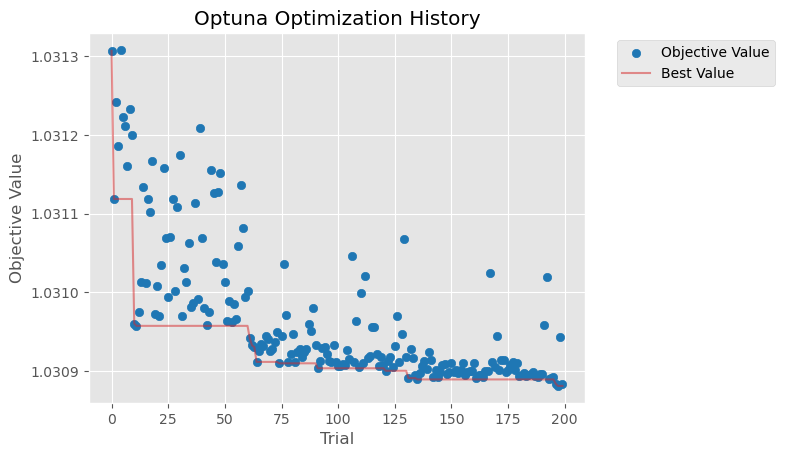

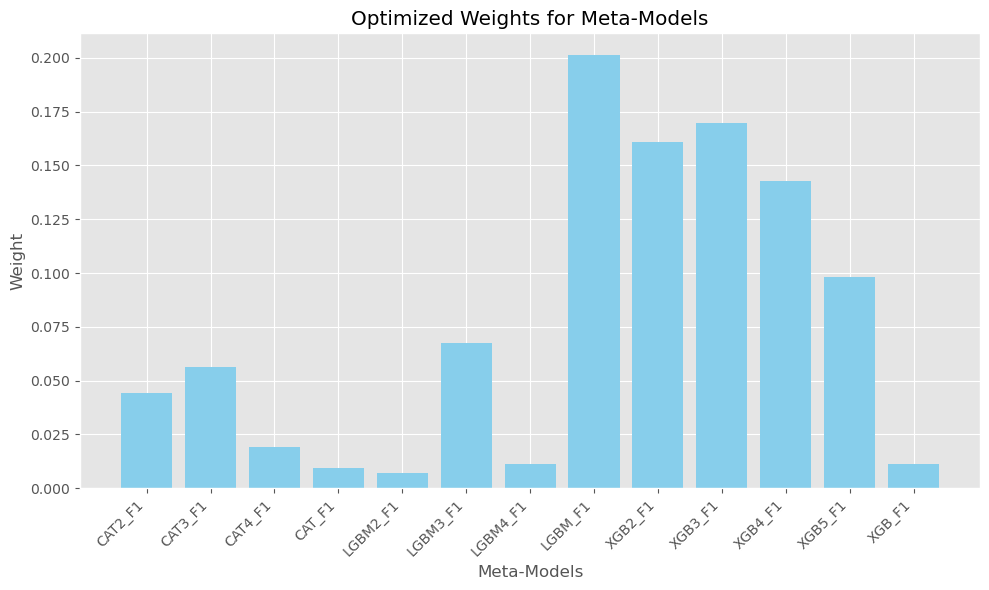

In [11]:
import optuna
import numpy as np
from sklearn.metrics import mean_squared_error
from optuna.visualization.matplotlib import (
    plot_optimization_history, 
    plot_param_importances, 
    plot_slice
)
import matplotlib.pyplot as plt

def optimize_ensemble_weights(X_meta_train, X_meta_test, y_train, n_trials=100):
    """
    Optimize ensemble weights for a given set of meta-features using Optuna.
    
    Parameters:
        X_meta_train (pd.DataFrame): OOF predictions (meta-features) for training.
        X_meta_test (pd.DataFrame): Predictions for the test set (meta-features).
        y_train (pd.Series): True target values for training.
        n_trials (int): Number of trials for Optuna optimization.
    
    Returns:
        dict: Optimized weights for each meta-model.
        np.ndarray: Final predictions on the test set.
    """
    # Define the objective function
    def objective(trial):
        num_models = X_meta_train.shape[1]
        weights = [trial.suggest_float(f"weight_{i}", 0, 1) for i in range(num_models)]
        weights = np.array(weights) / sum(weights)  # Normalize weights to sum to 1
        ensemble_preds = (X_meta_train.values * weights).sum(axis=1)
        rmse = np.sqrt(mean_squared_error(y_train, ensemble_preds))
        return rmse

    # Initialize and optimize the study
    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=n_trials)

    # df = study.trials_dataframe()
    # print(df)  

    # Retrieve the best weights
    best_weights = study.best_params
    normalized_weights = np.array([best_weights[f"weight_{i}"] for i in range(len(best_weights))])
    normalized_weights /= normalized_weights.sum()

    # Generate predictions for the test set
    test_preds = (X_meta_test.values * normalized_weights).sum(axis=1)

    # Print optimization results
    print("Optimized Weights:", normalized_weights)
    print("Best RMSE:", study.best_value)

    # Plot optimization history
    plot = plot_optimization_history(study)
    plt.title("Optuna Optimization History")
    plt.show()
    
    weight_mapping = dict(zip(X_meta_train.columns, normalized_weights))
    
    # Plot bar chart of weights
    plt.figure(figsize=(10, 6))
    plt.bar(weight_mapping.keys(), weight_mapping.values(), color="skyblue")
    plt.title("Optimized Weights for Meta-Models")
    plt.xlabel("Meta-Models")
    plt.ylabel("Weight")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

    return best_weights, test_preds, study.best_value

# Assuming meta_features (training meta-features), meta_predictions (test meta-features),
# and y_train (true target values) are already defined.
optimized_weights, test_predictions, weight_ensembling_score = optimize_ensemble_weights(
    X_meta_train=X_meta_train,
    X_meta_test=X_meta_test,
    y_train=y_train,
    n_trials=200
)

In [4]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from axyom_utilities.training import train_model_cv

# Neural Network class
class NeuralNetwork:
    def __init__(self, input_dim, learning_rate=0.001):
        self.model = Sequential([
            Dense(128, activation='relu', input_dim=input_dim),
            Dense(64, activation='relu'),
            Dense(1)
        ])
        self.model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    
    def fit(self, X_train, y_train, epochs=50, batch_size=32, verbose=0):
        self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
    
    def predict(self, X):
        return self.model.predict(X).flatten().ravel()

# Initialize models
meta_models = {
    #"Ridge": Ridge(alpha=1.0, random_state=42),
    "LightGBM": lgb.LGBMRegressor(random_state=42, verbose=-1)
    #"NeuralNetwork": NeuralNetwork(input_dim=X_meta_train.shape[1])
}

# Train and evaluate models
results = {}
for name, model in meta_models.items():
    r = train_model_cv(model, X_meta_train, y_train, X_meta_test, cv_splits=10)
    
    oof_preds = r['oof_preds']
    test_preds = r['test_preds']
    score = np.mean(r['cv_scores'])
    
    results[name] = {"oof_preds": oof_preds, "test_preds": test_preds, "score":score}
    print(f"{name} OOF RMSE: {score:.6f}")

# Compare stacking methods
# for method, result in results.items():
#     print(f"{method}: OOF RMSE = {result['oof_rmse']:.4f}")
# Find the best model
# best_model = max(results.items(), key=lambda x: x[1]["score"])
# best_name, best_data = best_model

# # Extract relevant details
# best_oof_preds = best_data["oof_preds"]
# best_test_preds = best_data["test_preds"]

# print(f"Best Model Name: {best_name}")
# print(f"OOF Predictions: {best_oof_preds}")
# print(f"Test Predictions: {best_test_preds}")


Training fold 1...
Fold 1 RMSE: 1.0338
Training fold 2...
Fold 2 RMSE: 1.0287
Training fold 3...
Fold 3 RMSE: 1.0284
Training fold 4...
Fold 4 RMSE: 1.0325
Training fold 5...
Fold 5 RMSE: 1.0320
Training fold 6...
Fold 6 RMSE: 1.0271
Training fold 7...
Fold 7 RMSE: 1.0322
Training fold 8...
Fold 8 RMSE: 1.0312
Training fold 9...
Fold 9 RMSE: 1.0337
Training fold 10...
Fold 10 RMSE: 1.0273
Mean CV RMSE: 1.0307 ± 0.0025
LightGBM OOF RMSE: 1.030690


In [5]:
results

{'LightGBM': {'oof_preds': array([6.86604487, 6.61481786, 6.73409579, ..., 5.26747052, 6.79981696,
         5.67555292]),
  'test_preds': array([6.78876534, 6.82375446, 6.70490667, ..., 6.75423886, 6.8195356 ,
         6.71713966]),
  'score': 1.0306895513430856}}

# Submission

In [ ]:
test_preds = results['LightGBM']['test_preds']
score = results['LightGBM']['score']

In [10]:
if False:
    y_pred = np.maximum(0, np.expm1(test_preds))

    submission = pd.DataFrame({
        'id': X_test.index,  
        'Premium Amount': y_pred
    })

    FILE_PATH = f"Stacking_v3_{score:.4f}.csv"

    submission.to_csv(FILE_PATH, index=False)